<a href="https://colab.research.google.com/github/bigirimanainnocent12/Apprentissage_automatique/blob/main/Apprentissage_Automatique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***PROJET DU COURS APPRENTISSAGE AUTOMATIQUE***

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# ***1. Chargement et préparation de données réelles***


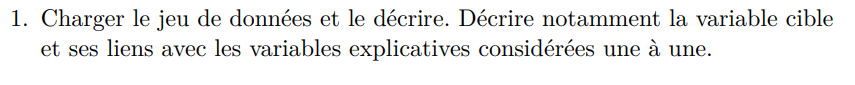

In [ ]:
import kagglehub
import pandas as pd
import os

# Télécharger la dernière version
chemin = kagglehub.dataset_download("thehapyone/uci-online-news-popularity-data-set")

print("Path to dataset files:", chemin)

# Trouver le fichier CSV dans le répertoire téléchargé
for filename in os.listdir(chemin):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(chemin, filename)
        break  # Arrêter après avoir trouvé le premier fichier CSV

# Lire le fichier CSV
DF = pd.read_csv(csv_file_path)
DF.head()


In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

# *** Vérifications des Valeurs manquantées***

In [4]:
DF.isna().sum()

,0
url,0
timedelta,0
n_tokens_title,0
n_tokens_content,0
n_unique_tokens,0
...,...
title_subjectivity,0
title_sentiment_polarity,0
abs_title_subjectivity,0
abs_title_sentiment_polarity,0


# *** Vérifications des Valeurs dupliquées***

In [8]:
DF.duplicated("url").sum()

0

# **La variable cible et ses liens avec les variables explicatives considérées une à une.**

# **Statistiques descriptives pour la variable cible**

In [13]:
DF[" shares"].describe()

,shares
count,39644.000000
mean,3395.380184
std,11626.950749
min,1.000000
25%,946.000000
50%,1400.000000
75%,2800.000000
max,843300.000000


In [ ]:
# Création de l'histogramme avec des barres séparées
import plotly.graph_objects as go
fig = go.Figure(go.Histogram(
    x=df[" shares"],
    nbinsx=30,             # Nombre de barres (ajustez-le pour espacer plus ou moins)
    marker=dict(
        color="blue",
        line=dict(
            color="black", # Couleur des contours pour séparer les barres
            width=1       # Largeur des contours
        )
    )
))

# Mise à jour de la mise en page
fig.update_layout(
    title="Histogramme writing_score",
    xaxis_title="Valeurs",
    yaxis_title="Fréquence",
    bargap=0.2             # Contrôle l'espacement entre les barres
)

# Affichage de la figure
fig.show()

# **Statistiques descriptives**

In [ ]:
# Création de l'histogramme avec des barres séparées
import plotly.graph_objects as go
fig = go.Figure(go.Histogram(
    x=DF[' shares'],
    nbinsx=30,             # Nombre de barres (ajustez-le pour espacer plus ou moins)
    marker=dict(
        color="blue",
        line=dict(
            color="black", # Couleur des contours pour séparer les barres
            width=1       # Largeur des contours
        )
    )
))

# Mise à jour de la mise en page
fig.update_layout(
    title="Histogramme pour la variable partage",
    xaxis_title="Partage",
    yaxis_title="Fréquence",
    bargap=0.2             # Contrôle l'espacement entre les barres
)

# Affichage de la figure
fig.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
t=DF.select_dtypes(include=["int64","float"])
t.corr()[" shares"].sort_values(ascending=False)[1:]

,shares
kw_avg_avg,0.110413
LDA_03,0.083771
kw_max_avg,0.064306
self_reference_avg_sharess,0.057789
self_reference_min_shares,0.055958
self_reference_max_shares,0.047115
num_hrefs,0.045404
kw_avg_max,0.044686
kw_min_avg,0.039551
num_imgs,0.039388


In [ ]:
import plotly.express as pe
fig = pe.bar(x=t.corr()[" shares"].sort_values(ascending=False)[1:].index,y=t.corr()[" shares"].sort_values(ascending=False)[1:], title="Corrélation entre la variable cible et les autres variables explicatives")
fig.update_layout(
    xaxis_tickangle=90,  # Rotation des étiquettes à 90 degrés
)
# Afficher le graphique
fig.show()

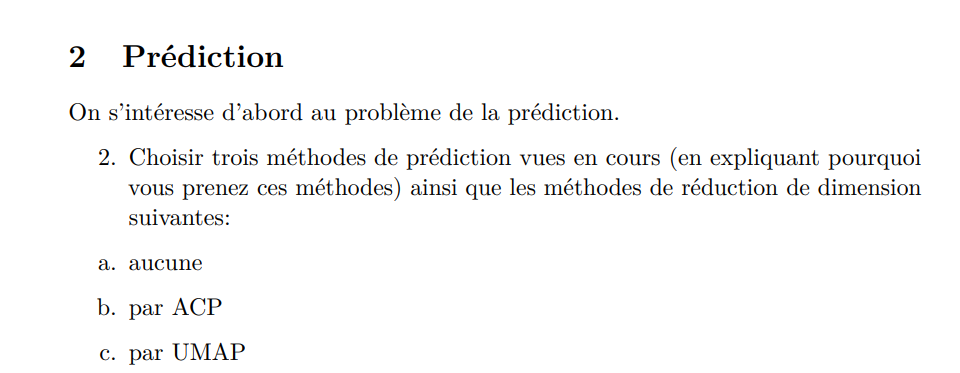


Les trois méthodes de prédiction vues en cours sont:



1) Régression Lasso: est une méthode de régression linéaire qui utilise une régularisation basée sur la norme L1. Elle est particuliérement utile lorsqu'on souhaite non seulement obtenir un modèle prédictif mais auusi effectuer une selection des variables car elle a la capacité de mettre à zéro certains coefficients, éliminant ainsi certains variables.

2)  Forêt aléatoire:

La méthode de forêt aléatoire est largement utilisée en régression en raison de sa robustesse et de sa précision accrues, car elle combine les résultats de plusieurs arbres de décision pour obtenir des prédictions plus stables et moins sensibles aux fluctuations des données. En prenant la moyenne des prédictions individuelles des arbres, elle réduit considérablement le risque de surajustement (*overfitting*) par rapport à un arbre de décision unique, ce qui accroît la fiabilité et la précision du modèle. La forêt aléatoire permet aussi de réduire la variance globale du modèle, car chaque arbre est construit sur un échantillon aléatoire de données avec une sélection aléatoire des caractéristiques, rendant le modèle plus fiable pour prédire sur de nouvelles données. De plus, cette approche est particulièrement bien adaptée pour capturer des relations non linéaires et des interactions complexes entre les variables d’entrée, ce qui est souvent difficile à appréhender avec des méthodes linéaires comme la régression linéaire. En parallèle, la forêt aléatoire gère efficacement les données bruitées et les valeurs extrêmes : la moyenne des prédictions de nombreux arbres réduit l’influence des valeurs aberrantes, permettant au modèle de rester stable sans être trop sensible aux observations inhabituelles.

3) KNN: La régression KNN est prisée pour sa simplicité et son absence d'hypothèses strictes sur la relation entre les variables, ce qui en fait une méthode non paramétrique adaptée aux relations complexes. Elle se base uniquement sur la proximité des données pour prédire, offrant une flexibilité pour modéliser des formes variées et capter des tendances locales, notamment grâce à l'utilisation de la moyenne ou de la médiane des valeurs des voisins. KNN est également robuste face aux valeurs aberrantes si le nombre de voisins (k) est bien choisi et fonctionne bien sur des ensembles de données de petite taille, bien qu’il puisse devenir coûteux dans les grands ensembles ou en haute dimension. Cependant, il reste viable pour des applications de grande dimension lorsqu’il est combiné avec des techniques de réduction de dimension, comme l’analyse en composantes principales (PCA).





In [6]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

NameError: name 'x' is not defined

In [8]:
variables_qualitative=DF[[' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday',' weekday_is_thursday',' weekday_is_friday',' weekday_is_saturday',' weekday_is_sunday',
                        ' is_weekend',' data_channel_is_entertainment',' data_channel_is_bus',' data_channel_is_socmed',' data_channel_is_tech',
                         ' data_channel_is_world',' data_channel_is_lifestyle' ]].astype("object")

variables_quantitative = DF[DF.columns.difference(variables_qualitative.columns)].drop("url",axis=1)


In [9]:
def z(share):
  # Use apply to apply the function element-wise to the Series
  return share.apply(lambda x: '1' if x <= 1400 else '0').astype("category")

Y = pd.DataFrame(z(DF[' shares']))

In [10]:
quantitative=variables_quantitative.drop(' shares',axis=1)
qualitative=pd.concat([variables_qualitative,Y ],axis=1)
data=pd.concat([quantitative,qualitative],axis=1)

In [11]:
Y=data[' shares']
x=data.drop([' shares'],axis=1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), data.select_dtypes(include=['int64','float64']).columns),
        ('cat', 'passthrough', data.select_dtypes(include=['object']).columns)
    ]
)

In [15]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index([' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' abs_title_sentiment_polarity', ' abs_title_subjectivity',
       ' average_token_length', ' avg_negative_polarity',
       ' avg_positive_polarity', ' global_rate_negative_words',
       ' global_rate_positive_words', ' global_sentiment_polarity',
       ' global_subjectivity', ' kw_avg...
                                ('cat', 'passthrough',
                                 Index([' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world',
       ' data_channel_is_lifestyle'],
      dtype='object'))])

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier # Importing KNeighborsClassifier

# Removing the 'steps' keyword and passing estimators as positional arguments
model = make_pipeline(
    preprocessor,
    KNeighborsClassifier()
)

In [17]:
from sklearn.model_selection import GridSearchCV

# Corrected parameter names
param = {
    'kneighborsclassifier__n_neighbors': range(1, 500),
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'kneighborsclassifier__n_jobs': [-1],
    'kneighborsclassifier__p': [1, 2]
}

grid = GridSearchCV(model, param_grid=param, cv=5, scoring='accuracy')

In [18]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index([' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' abs_title_sentiment_polarity', ' abs_title_subjectivity',
       ' average_token_length', ' avg_negative_polarity',
       ' avg_positive_polarity', ' global_rate_negative_words',
       ' global_rate_positive_words', ' global_sentiment_po...
                                                  Index([' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world',
       ' data_channel_is_lifestyle'],
      dtype='object'))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
grid.fit(X_train,y_train)

In [164]:
predit=model.predict(X_test)

In [165]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predit)

0.6302181864043385

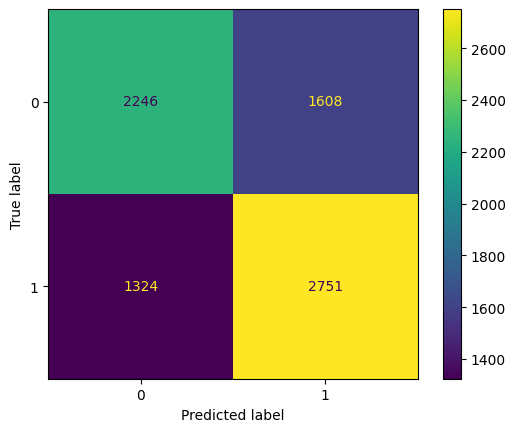

In [166]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,predit)

# **Régression Lasso**

In [ ]:
from sklearn.linear_model import LassoCV
modele1 = LassoCV(cv=5,eps=0.000001,n_alphas=100)
modele1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13885354.215209961, tolerance: 2728584.7614426464
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19895674.405395508, tolerance: 2728584.7614426464
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20824031.141983032, tolerance: 2728584.7614426464
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: Converge

LassoCV(cv=5, eps=1e-06)

In [ ]:
modele1.alpha_

1.043184785582428

# **Evaluation des performances du modèle**

In [ ]:
prediction_modele1=modele1.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse=mean_squared_error(y_test,prediction_modele1)
print(f'Erreur quadratique moyenne Test: {mse}')

r2=r2_score(y_test,prediction_modele1)
print(f'Coefficient de détermination Test: {round(r2*100,2)}')

mea=mean_absolute_error(y_test,prediction_modele1)
print(f'Erreur absolue moyenne Test: {mea}')

Erreur quadratique moyenne Test: 1057776.616616936
Coefficient de détermination Test: 11.99
Erreur absolue moyenne Test: 765.8370166709972


# **Les coefficients de notre modèle de régression Lasso**

In [ ]:
modele1.coef_

array([ 1.36477964e+02, -1.18798311e+01, -2.58868723e+01, -0.00000000e+00,
        4.57554750e+01, -1.75015887e+00,  2.67902055e+01, -3.65164047e+01,
       -1.43040234e+01, -3.83099682e+00,  0.00000000e+00, -0.00000000e+00,
       -1.08880329e+01,  3.71556532e+01,  3.88388571e+02, -3.89106444e+01,
       -8.98577069e+01, -2.31406687e+02, -2.09516578e+01,  7.73005864e+01,
       -2.46681460e+01, -1.66049757e+01,  5.40483127e+01,  1.12249847e+01,
       -2.39132560e+01,  1.93209550e+00, -1.74717408e+01, -3.94038243e+01,
        2.56842068e+01,  5.00469642e+01, -2.52422914e+00, -2.51435873e+00,
        2.56790836e+01,  1.39849842e-01,  4.47307597e+01, -2.68673059e+01,
       -6.01222556e+00,  0.00000000e+00,  3.64524501e+01,  1.16115293e+01,
        1.55442000e+01,  1.26917681e+01,  3.42691148e+00,  1.69346487e+01,
        2.11741382e+01, -1.02738386e+01, -5.22738205e+01, -4.20730180e+01,
        9.11568424e+01,  1.00348471e+02, -0.00000000e+00,  1.48803659e+01,
       -9.61163983e+00, -

# **Forêt aléatoire**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
modele2 = RandomForestRegressor(n_estimators=100,n_jobs=-1) # n_jobs : Nombre de cœurs à utiliser pour l’entraînement. Utiliser -1 pour exploiter tous les cœurs disponibles.
modele2.fit(X_train, y_train) #n_estimators : Nombre d'arbres dans la forêt.

RandomForestRegressor(n_jobs=-1)

In [ ]:
prédiction_modele2=modele2.predict(X_test)

# **Evaluation des performances du modèle**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse=mean_squared_error(y_test,prédiction_modele2)
print(f'Erreur quadratique moyenne Test: {mse}')
mea=mean_absolute_error(y_test,prédiction_modele2)
print(f'Erreur absolue moyenne Test: {mea}')

Erreur quadratique moyenne Test: 1053665.6055033186
Erreur absolue moyenne Test: 774.3247770972796


# ***Les coefficients de notre modèle forêt aléatoire***

In [ ]:
modele2.feature_importances_

array([3.42387636e-02, 2.97165423e-02, 2.99641502e-02, 2.76859838e-02,
       2.70332892e-02, 9.04446119e-03, 1.04410257e-02, 2.89789384e-02,
       2.38858517e-02, 2.70105657e-02, 2.23499892e-02, 2.60220040e-02,
       2.33763126e-02, 2.88106570e-02, 6.21876215e-02, 3.03894280e-02,
       2.81229257e-02, 3.33128667e-02, 1.54083171e-03, 2.41125188e-02,
       2.06452545e-02, 1.38099488e-02, 1.29724468e-03, 1.30183341e-02,
       8.32870618e-03, 1.07478206e-02, 1.32767581e-02, 2.63838473e-02,
       5.76016154e-05, 2.93422685e-02, 1.72438441e-02, 2.76731212e-02,
       2.22034994e-02, 1.40009289e-02, 5.64254279e-03, 1.31957544e-02,
       7.89821356e-03, 1.19594836e-02, 1.21030353e-02, 2.57315055e-02,
       1.81794563e-02, 2.57907120e-02, 3.86636709e-02, 1.42380221e-02,
       1.18567647e-02, 1.32017465e-03, 1.24563455e-02, 1.00115135e-03,
       1.14327261e-02, 1.10662589e-02, 9.82651815e-04, 2.44161136e-03,
       2.37032254e-03, 2.40573432e-03, 3.14186528e-03, 1.37065839e-03,
      

In [ ]:
Q1 = df[" shares"].quantile(0.25)
Q3 = df[" shares"].quantile(0.75)
IQR = Q3 - Q1

# ***KNN***

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 100)}
modele3_grid = GridSearchCV(KNeighborsRegressor(weights='distance',    # Pondération par distance
    algorithm='auto',      # Choix automatique de l'algorithme
    leaf_size=30,          # Taille de la feuille pour ball_tree ou kd_tree
    p=2,                   # Utilisation de la distance euclidienne
    metric='minkowski',    # Distance Minkowski
    n_jobs=-1), param_grid, cv=5, scoring='r2')              # Utilisation de tous les coeurs disponibles)
modele3_grid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_jobs=-1, weights='distance'),
             param_grid={'n_neighbors': range(1, 100)}, scoring='r2')

In [ ]:
modele3_grid.best_params_

{'n_neighbors': 99}

In [ ]:
prediction_modele3=modele3_grid.predict(X_test)

# **Evaluation des performances du modèle**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mse=mean_squared_error(y_test,prediction_modele3)
print(f'Erreur quadratique moyenne Test: {mse}')
r2=r2_score(y_test,prediction_modele3)
print(f'Coefficient de détermination Test: {round(r2*100,2)}')
mea=mean_absolute_error(y_test,prediction_modele3)
print(f'Erreur absolue moyenne Test: {mea}')

Erreur quadratique moyenne Test: 1076002.3988117848
Coefficient de détermination Test: 10.47
Erreur absolue moyenne Test: 759.6097334985951


# **Par ACP**